In [102]:
#importing all the neccesary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import json

import warnings
warnings.filterwarnings('ignore')

In [78]:
credits_path = '/Users/sunnychang/Library/CloudStorage/OneDrive-Personal/NYU Document/NYU/Github/Data-Science-Bootcamp/archive/tmdb_5000_credits.csv'
movies_path = '/Users/sunnychang/Library/CloudStorage/OneDrive-Personal/NYU Document/NYU/Github/Data-Science-Bootcamp/archive/tmdb_5000_movies.csv'

df_credits = pd.read_csv(credits_path)
df_movies = pd.read_csv(movies_path)

In [79]:
print(df_credits.shape)
df_credits.head()

(4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [80]:
print(df_movies.shape)
df_movies.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [81]:
data = df_movies.merge(df_credits, on='title')
print(data.shape)
data.head(2)

(4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [83]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [84]:
data.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [85]:
# seperate object and numeric data (exclude movie_id, runtime, homepage, tagline, cast, crew)
col_num = ['budget', 'id', 'popularity', 'revenue', 'vote_average', 'vote_count']
data_num = data[col_num]
col_obj = ['genres', 'keywords', 'original_language', 'original_title', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'title']
data_obj = data[col_obj]

<Axes: xlabel='vote_average', ylabel='Count'>

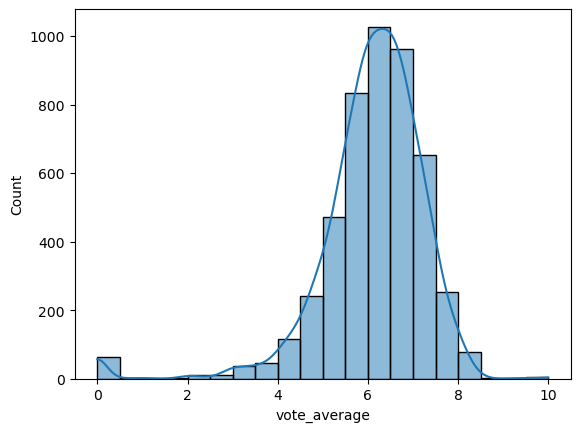

In [ ]:
# Histogram of vote_average
sns.histplot(data["vote_average"], bins=20, kde=True)
# Helps you understand if ratings are skewed (e.g., most movies rated ~6–7).

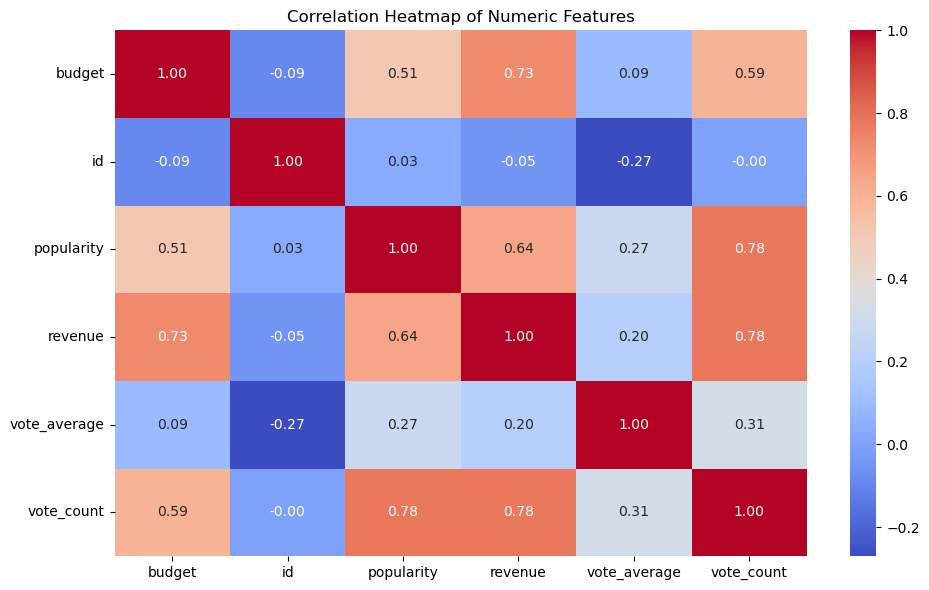

In [87]:
# 1. Correlation Heatmap (for numeric features)
plt.figure(figsize=(10, 6))
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


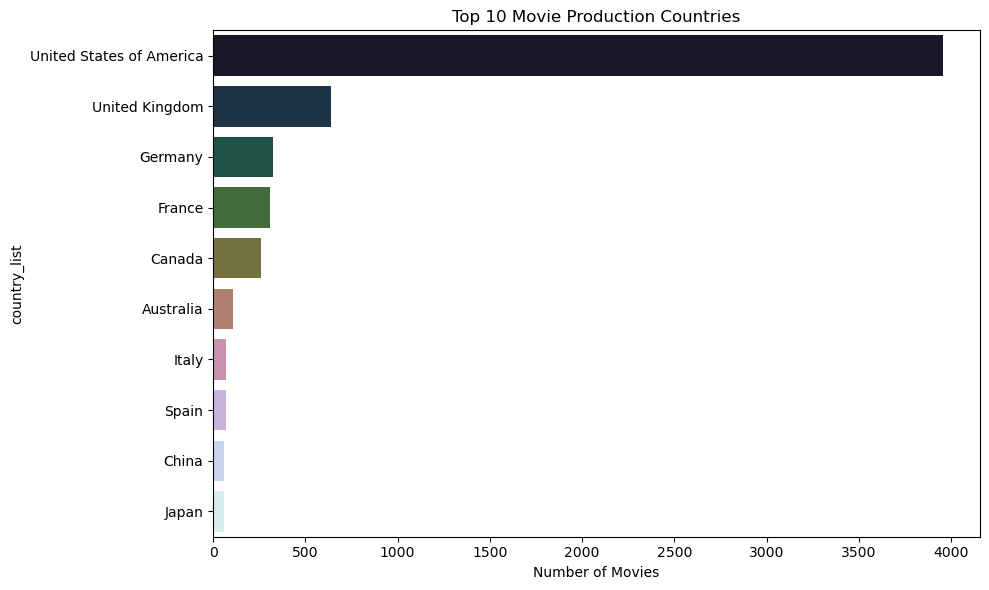

In [112]:
# Clean version of extraction using proper JSON loading
def extract_country_names(country_str):
    try:
        countries = json.loads(country_str)
        return [c.get("name") for c in countries if "name" in c]
    except:
        return []

# Apply extraction
data["country_list"] = data["production_countries"].apply(extract_country_names)

# Explode into long format and count
country_exploded = data.explode("country_list")
top_countries = country_exploded["country_list"].value_counts().head(10)

# Plot Top Movie Production Countries (cleaned)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")
plt.title("Top 10 Movie Production Countries")
plt.xlabel("Number of Movies")
plt.tight_layout()
plt.show()


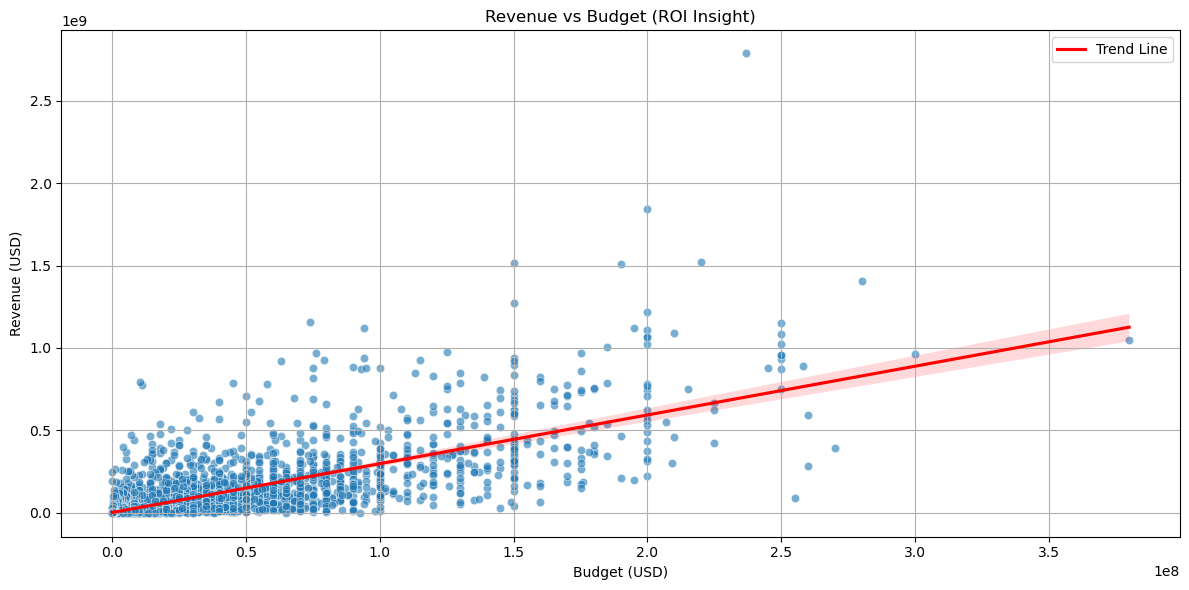

In [104]:
# 3. Revenue vs Budget (with ROI)
roi_data = data[(data["budget"] > 0) & (data["revenue"] > 0)].copy()
roi_data["ROI"] = roi_data["revenue"] / roi_data["budget"]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=roi_data, x="budget", y="revenue", alpha=0.6)
sns.regplot(data=roi_data, x="budget", y="revenue", scatter=False, color="red", label="Trend Line")
plt.title("Revenue vs Budget (ROI Insight)")
plt.xlabel("Budget (USD)")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

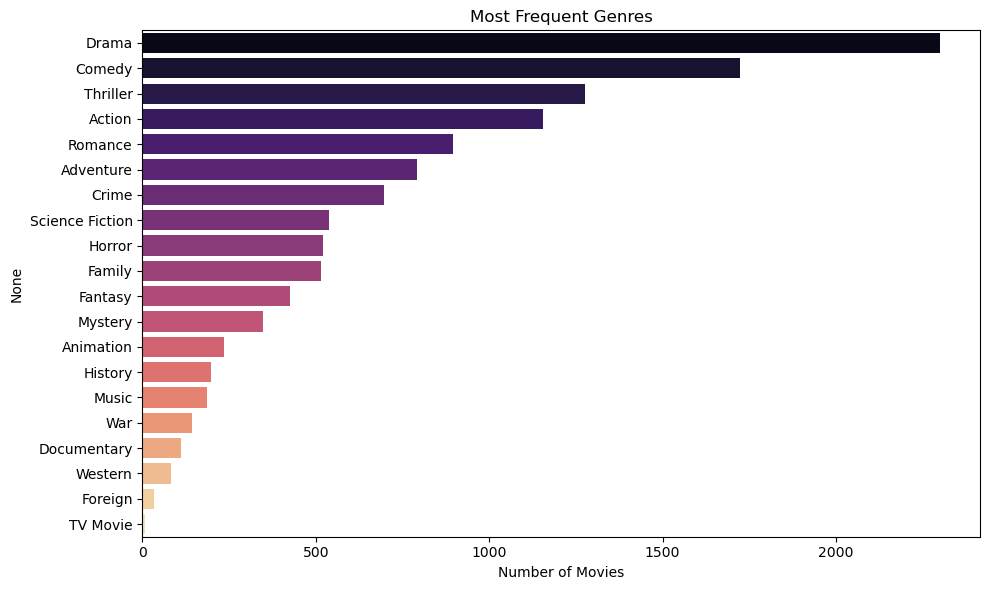

In [110]:
# 4. Most Frequent Genres 
def extract_genres(genre_str):
    try:
        genres = json.loads(genre_str.replace("'", '"'))
        return [g["name"] for g in genres]
    except:
        return []

data["genre_list"] = data["genres"].apply(extract_genres)
genre_counts = pd.Series([g for sublist in data["genre_list"] for g in sublist]).value_counts() #.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")
plt.title("Most Frequent Genres")
plt.xlabel("Number of Movies")
plt.tight_layout()
plt.show()

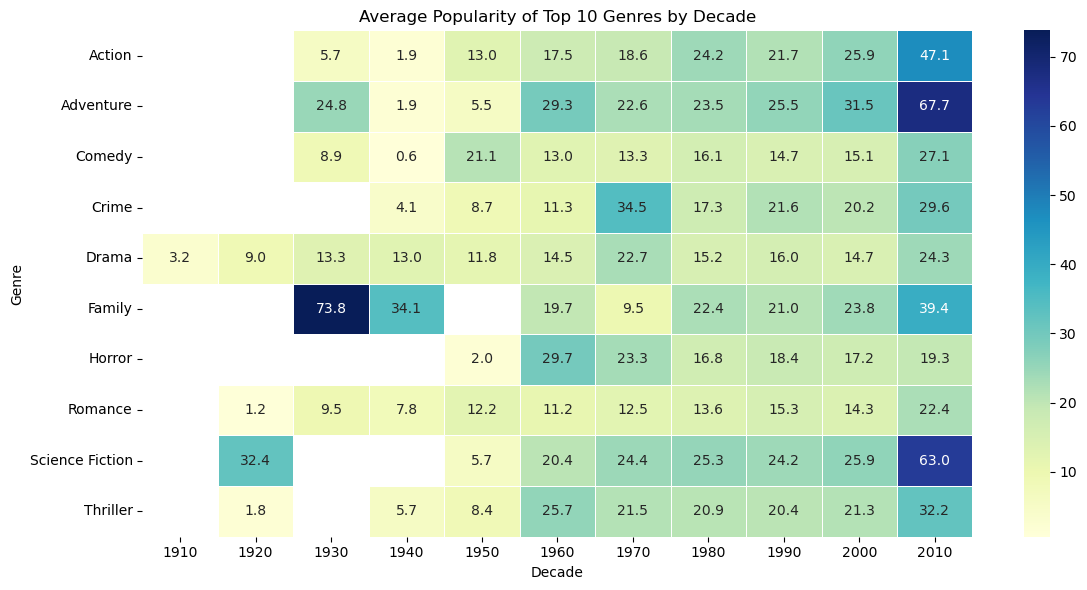

In [106]:
# Prepare decade column
data["release_date"] = pd.to_datetime(data["release_date"], errors="coerce")
data = data.dropna(subset=["release_date"])
data["decade"] = (data["release_date"].dt.year // 10) * 10

# Get top 10 genres by frequency
top_genres = pd.Series([g for sublist in data["genre_list"] for g in sublist]).value_counts().head(10).index.tolist()

# Explode genres
genre_exploded = data.explode("genre_list")
genre_exploded = genre_exploded[genre_exploded["genre_list"].isin(top_genres)]

# Group by decade and genre and calculate average popularity
genre_popularity = genre_exploded.groupby(["decade", "genre_list"])["popularity"].mean().reset_index()

# Pivot for heatmap
heatmap_data = genre_popularity.pivot(index="genre_list", columns="decade", values="popularity")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Popularity of Top 10 Genres by Decade")
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
